In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# Discretización
xi, xf, Npoints = 0.,1.,21

h = (xf-xi)/float(Npoints-1)

x = np.linspace(xi,xf,Npoints)
y = np.linspace(xi,xf,Npoints)

print(h)

rq = [0.51,0.21]

0.05


In [3]:
# Potencial
def Potencial(x,y):
    
    p = 1./np.sqrt( (x - rq[0] )**2 + (y - rq[1])**2 ) - 1./np.sqrt( ( x - rq[0])**2 + (y + rq[1])**2 )
    
    return p

In [4]:
X, Y = np.meshgrid(x,y)
V = Potencial(X,Y)

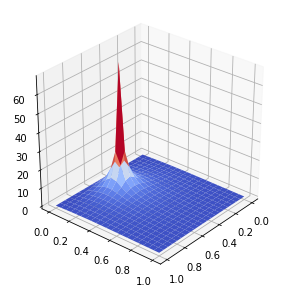

In [5]:
fig1 = plt.figure(figsize=(5,5))
ax = fig1.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 40)
ax.plot_surface(X,Y,V, cmap=cm.coolwarm)

In [6]:
# Derivadas
def Dx(f,x,y,h):
    
    derivada = 0.
    
    if h != 0.:
        derivada = (f( x + h, y) - f( x - h, y))/(2.*h)
    
    return derivada

def Dy(f,x,y,h):
    
    derivada = 0.
    
    if h != 0.:
        derivada = (f( x , y + h) - f( x , y - h))/(2.*h)
    
    return derivada

In [7]:
# Definimos una matriz para almacenar el campo
Ex = np.zeros((len(x), len(y)))
Ey = np.zeros((len(x), len(y)))

In [8]:
for i in range(1,len(x)): # No tocar la superficie del conductor
    for j in range(1,len(y)):
    
        Ex[i,j] = - Dx( Potencial, x[i], y[j], h ) 
        Ey[i,j] = - Dy( Potencial, x[i], y[j], h ) 

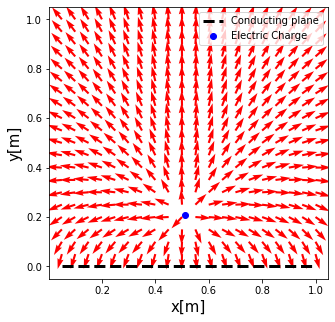

In [18]:
fig2 = plt.figure(figsize=(5,5))
ax = fig2.add_subplot(1,1,1)

ax.scatter(rq[0],rq[1],color='b',label='Electric Charge')
yc = np.zeros(len(x)-1)
ax.plot(x[1:],yc,'--',color='k',linewidth=3,label='Conducting plane')

for i in range(1,len(x)): # No tocar la superficie del conductor
    for j in range(1,len(y)):
        ax.quiver(x[i],y[j],Ex[i,j],Ey[i,j],color='r')
        
ax.set_xlabel('x[m]', fontsize=15)
ax.set_ylabel('y[m]', fontsize=15)

plt.legend(loc=0)
plt.savefig('CampoElectricoImagenes.pdf')

In [10]:
# Using a meshgrid

U = -Dx(Potencial,X,Y,h)
V = -Dy(Potencial,X,Y,h)

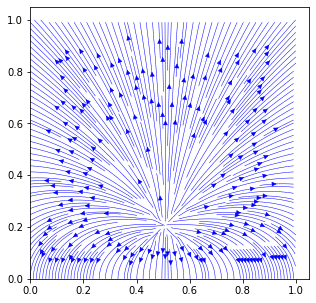

In [11]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
h = ax.streamplot(X,Y,U,V,density=3.0, color='b',cmap='jet',linewidth=0.5)